In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
df = adult.data.features 
y  = adult.data.targets.to_numpy() 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [3]:
# df = pd.read_csv('adult.data')
# df.head()

In [4]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# sns.histplot(df['charges'], kde=True)  # kde=True adds the Gaussian-like curve
# plt.title('Distribution of Insurance Charges')
# plt.xlabel('Charges')
# plt.ylabel('Frequency')

# # Find and mark the median
# median_charges = df['charges'].median()
# plt.axvline(median_charges, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_charges:.2f}')
# plt.legend()
# plt.show()

In [5]:
# df['charges'] = df['charges'].apply(lambda x: 1 if x >= 10000 else 0)
# df

In [6]:
# df['region'].value_counts()

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [8]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object),
 array([24720, 12435,  7841,  3846]))

In [9]:
y = list(y)
for i in range(len(y)):
    if y[i] == '<=50K' or y[i] == '<=50K.':
        y[i] = 0
    else:
        y[i] = 1
        
y = np.array(y)
np.unique(y)

array([0, 1])

In [10]:
df['income'] = y
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [11]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace = True)

In [12]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
country            583
income               0
dtype: int64

In [13]:
# code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

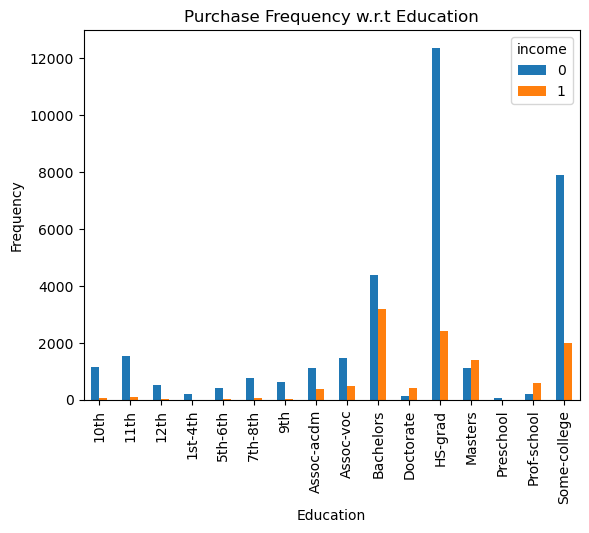

In [14]:
pd.crosstab(df.education,df.income).plot(kind='bar')
plt.title('Purchase Frequency w.r.t Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [15]:
cat_cols = ['workclass', 'education', 'marital', \
            'occupation', 'relationship', 'race', 'sex', 'country']

In [16]:
def one_hot(df, cols): # idk if sklearns one-hot encoder is similar
    """
    df: pandas DataFrame
    param: cols a list of columns to encode
    return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [17]:
def numeric_scaler(df, cols):
    '''
    df: pandas dataframe
    numeric_cols: (array of strings) column names for numeric variables

    no return: does inplace operation
    '''
    df_new = df.copy()
    mmscaler = MinMaxScaler()
    df_new[cols] = mmscaler.fit_transform(df_new[cols])
    return df_new

In [18]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [19]:
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

In [20]:
numeric_all = ['age', 'bmi', 'children', 'charges']
# cat_all = ['sex', 'smoker', 'region']
# df_medical_mm = numeric_scaler(df, numeric_all) # minmax scaling for all numeric columns, so all elements in [0,1]
df_medical_mm_oh = one_hot(df, cat_cols)
df_medical_mm_oh.drop(cat_cols, axis = 1, inplace=True) # drop categories that were used to one hot encode
df_medical_mm_oh = df_medical_mm_oh * 1.0 # make bool true, false into 1.0, 0.0

In [21]:
df_medical_mm_oh.head()

,age,fnlwgt,education-num,capital gain,capital loss,hours per week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X = df_medical_mm_oh
X['intercept'] = 1.0
X = X.to_numpy() # now (n, d+1) dimensional, log regression in d+1 is affine in d
X.shape

(45222, 106)

In [23]:
X

array([[3.90000e+01, 7.75160e+04, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.00000e+01, 8.33110e+04, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.80000e+01, 2.15646e+05, 9.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [3.80000e+01, 3.74983e+05, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.40000e+01, 8.38910e+04, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.50000e+01, 1.82148e+05, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [24]:
def normalize_columns(X):
    # Calculate the L2 norm of each column
    col_norms = np.linalg.norm(X, ord=2, axis=0)
    
    # Find scaling factors where norm > 1
    scaling_factors = np.maximum(col_norms, 1.0)  # Ensures norms <= 1
    
    # Scale columns with their respective factors
    X_normalized = X / scaling_factors
    return X_normalized

In [25]:
X = normalize_columns(X)
X

array([[0.00450039, 0.00167856, 0.00585806, ..., 0.        , 0.        ,
        0.00470246],
       [0.00576973, 0.00180404, 0.00585806, ..., 0.        , 0.        ,
        0.00470246],
       [0.004385  , 0.00466967, 0.00405558, ..., 0.        , 0.        ,
        0.00470246],
       ...,
       [0.004385  , 0.00812   , 0.00585806, ..., 0.        , 0.        ,
        0.00470246],
       [0.00507737, 0.0018166 , 0.00585806, ..., 0.        , 0.        ,
        0.00470246],
       [0.00403881, 0.00394429, 0.00585806, ..., 0.        , 0.        ,
        0.00470246]])

In [26]:
np.linalg.norm(X, ord=2, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [27]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X = normalizer.fit_transform(X)

print(X)

[[0.13191593 0.04920198 0.17171205 ... 0.         0.         0.13783895]
 [0.1989062  0.06219267 0.20195121 ... 0.         0.         0.16211292]
 [0.13781377 0.14676044 0.12746071 ... 0.         0.         0.14779112]
 ...
 [0.16762984 0.31041156 0.22394217 ... 0.         0.         0.17976579]
 [0.12720586 0.04551226 0.14676503 ... 0.         0.         0.11781314]
 [0.11151355 0.10890369 0.16174384 ... 0.         0.         0.12983713]]


In [28]:
np.linalg.norm(X)

212.6546496082341

In [29]:
import math
math.sqrt(X.shape[0])

212.65464960823218

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

In [31]:
# y = np.where(y == '<=50K', 0, 1)
# y.shape

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=43)
print("Training data x, y shapes", X_train.shape, y_train.shape)
print("Test data x, y shapes", X_test.shape, y_test.shape)

Training data x, y shapes (40699, 106) (40699,)
Test data x, y shapes (4523, 106) (4523,)


In [33]:
# import numpy as np
# import math

# ### Needs a check again

# def sample_l2lap(eta:float, d:int) -> np.array:
#     """
#         Returns
#           d dimensional noise sampled from `L2 laplace'
#           https://math.stackexchange.com/questions/3801271/sampling-from-a-exponentiated-multivariate-distribution-with-l2-norm
#     """
#     R = np.random.gamma(d, scale = 1.0/eta)
#     Z = np.random.normal(0, 1, size = d)
#     return R  * (Z / np.linalg.norm(Z)) #shape is (d,) one dimensional

In [34]:
# dictt = {}
# n = X_train.shape[0]
# n

In [35]:
# n, input_dim = X_train.shape[0], X_train.shape[1]
# output_dim = 1

# #logistic regression class
# class LogisticRegression(torch.nn.Module):
#     def __init__(self, input_dim, output_dim, hidden_dim=64):
#         super(LogisticRegression, self).__init__()
#         self.linear1 = torch.nn.Linear(input_dim, hidden_dim)
#         self.linear2 = torch.nn.Linear(hidden_dim, output_dim)
#         self.sigmoid = torch.nn.Sigmoid()
#         self.relu = torch.nn.ReLU()

#     #sigmoid transformation of the input
#     def forward(self, x):
#         x = self.linear1(x)
#         x = self.relu(x)
#         x = self.linear2(x)
# #         x = self.relu(x)
#         x = self.sigmoid(x)
#         return x

In [36]:
# from tqdm import tqdm
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# # Define the linear regression model
# # class LinearRegression(nn.Module):
# #     def __init__(self, input_dim):
# #         super(LinearRegression, self).__init__()
# #         self.linear = nn.Linear(input_dim, 1)

# #     def forward(self, x):
# #         return torch.sigmoid(self.linear(x))

# def train_model(X_train, y_train, eps_p, epochs=1000):

#     # Convert data to PyTorch tensors
#     X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
#     y_train = np.array(y_train)
#     y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)


#     # Initialize the model, loss function, and optimizer
# #     model = LogisticRegression(input_dim, output_dim)
#     criterion = nn.BCELoss(reduction='sum') # Binary Cross Entropy Loss for binary classification
    
#     d = X_train.shape[1]
#     lr = 1e-4
    
    
#     theta_init = torch.randn((d,1),requires_grad=True)
#     optimizer = optim.Adam([theta_init], lr=lr)
    
#     eps_dash_p = eps_p - (2 * np.log(1 + (1 / Lamb)))

#     if eps_dash_p > 0:
#         Delta = 0
#     else:
#         Delta = (1 / (np.exp(eps_p / 4) - 1)) - Lamb
#         eps_dash_p = eps_p / 2

#     eta = eps_dash_p / ((4 * X_train.shape[0]) + (8 * math.sqrt(X_train.shape[0])))

# #     theta_d = sum(p.numel() for p in model.parameters() if p.requires_grad)
#     b = np.random.gamma(d, scale=1.0 / eta, size=(theta_init, 1))
#     b = torch.Tensor(b.reshape(1, -1))

#     # Training loop
#     for epoch in tqdm(range(epochs), desc='Training'):
#         model.train()
#         epoch_loss = 0.0

#         for batch_X, batch_y in data_loader:
#             optimizer.zero_grad()

#             # Forward pass
# #             outputs = model(batch_X)
# #             theta = torch.cat([p.flatten() for p in model.parameters()])

            
#             y_hat_init = torch.matmul(batch_X, theta_init.float())
#             outputs = torch.nn.Sigmoid(y_hat_init)
            
            

#             # Add perturbation
#             pert = torch.dot(b.flatten(), theta.flatten())

#             # Calculate the loss
#             loss = (
#                 criterion(outputs, batch_y)
#                 + pert
#                 + ((Lamb + Delta) * (torch.norm(theta_init, p=2) ** 2))
#             )
#             epoch_loss += loss.item()

#             # Backward and optimize
#             loss.backward()
#             optimizer.step()

#         # Logging training loss
#         if (epoch + 1) % 20 == 0:
#             print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {epoch_loss:.4f}')

#     return model

In [37]:
# import optuna

# def objective(trial, X, y):
#     # Define the hyperparameter search space
#     learning_rate = trial.suggest_float('learning_rate', 1e-6, 1e-1, log=True)
# #     eta = trial.suggest_float('eta', 0.1, 10.0, log=True)
#     epochs = trial.suggest_int('epochs', 1, 1000)
    
#     # Split data into train and validation sets
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
    
#     try:
#         # Train the model with suggested hyperparameters
#         model = train_model(
#             X_train=X_train,
#             y_train=y_train,
#             eps_p=np.inf,
#             epochs=epochs
#         )
        
#         # Update the model's optimizer with suggested learning rate and weight decay
#         model.optimizer = torch.optim.Adam(
#             model.parameters(),
#             lr=learning_rate
#         )
        
#         # Evaluate on validation set
#         with torch.no_grad():
#             X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
#             val_outputs = model(X_val_tensor)
#             val_predictions = (val_outputs >= 0.5).float().numpy()
#             accuracy = accuracy_score(y_val, val_predictions)
            
#         return accuracy
    
#     except Exception as e:
#         # Return a very low score if training fails
#         print(f"Trial failed with error: {str(e)}")
#         return float('-inf')

# def optimize_hyperparameters(X, y, n_trials=100):
#     study = optuna.create_study(direction='maximize')
    
#     # Create a partial function with fixed X and y
#     objective_with_data = lambda trial: objective(trial, X, y)
    
#     # Run the optimization
#     study.optimize(objective_with_data, n_trials=n_trials)
    
#     print("Best hyperparameters:", study.best_params)
#     print("Best accuracy:", study.best_value)
    
#     return study.best_params, study.best_trial

In [38]:
# from sklearn.metrics import accuracy_score

# Lamb = n

# best_params, best_trial = optimize_hyperparameters(X_train, y_train, n_trials=100)

# # Train final model with best parameters
# final_model = train_model(
#     X_train=X,
#     y_train=y,
#     eps_p=np.inf,
#     epochs=best_params['epochs']
# )
# final_model.optimizer = torch.optim.Adam(
#     final_model.parameters(),
#     lr=best_params['learning_rate']
# )

In [39]:
# from tqdm import tqdm
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# # Define the linear regression model
# # class LinearRegression(nn.Module):
# #     def __init__(self, input_dim):
# #         super(LinearRegression, self).__init__()
# #         self.linear = nn.Linear(input_dim, 1)

# #     def forward(self, x):
# #         return torch.sigmoid(self.linear(x))

# def twostg_train_model(X_train, y_train, eps_p, \
#                        lr, weight_decay, epochs):

#     # Convert data to PyTorch tensors
#     X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
#     y_train = np.array(y_train)
#     y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)


#     # Initialize the model, loss function, and optimizer
#     model = LogisticRegression(input_dim, output_dim)
#     criterion = nn.BCELoss(reduction='sum') # Binary Cross Entropy Loss for binary classification
#     optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
#     eps_dash_p = eps_p - (2 * np.log(1 + (1/Lamb)))

#     if eps_dash_p > 0:
#         Delta = 0
#     else:
#         Delta = (1 / (np.exp(eps_p/4) - 1)) - Lamb
#         eps_dash_p = eps_p / 2

#     eta = eps_dash_p / ((4 * n) + (8 * math.sqrt(n)))

# #     patience = 10
# #     scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=1e-3, patience=patience, \
# #                                 verbose=True)


#     # Training loop
    
#     #   b, Lamb, Delta = get_noise_vector(eps_dash_p)
#     theta_d = sum(p.numel() for p in model.parameters() if p.requires_grad)

# #     print("n = ", X_train.shape[0])

#     d = X_train.shape[1]
#     b = np.random.gamma(d, scale=1.0/eta, size=(theta_d,1))
#     #     sample_l2lap(eta, X_train.shape[1])
# #     print(b)
#     b = b.reshape(1, -1)    


#     for epoch in tqdm(range(epochs), desc='Training'):

#         optimizer.zero_grad()
#         # Forward pass
#         outputs = model(X_train_tensor)
#         theta = torch.cat([p.flatten() for p in model.parameters()])
# #         theta = theta.reshape(1, -1)
#         b = torch.Tensor(b)
# #         print(b.shape)
#         #       print(theta.shape)
#         pert = torch.dot(b.flatten(), theta.flatten())
#         #       print(pert)
#         # print(pert[0,0])
#         # print(pert.shape)
#         # if eps_p == 100:
#         #   print(pert[0,0])
#         # Calculate the loss
# #         print(criterion(outputs, y_train_tensor))
#         loss = criterion(outputs, y_train_tensor) \
#             + pert \
#             + ((Lamb + Delta) * (torch.norm(theta, p=2)**2))

#         # Backward and optimize
#         loss.backward()
#         optimizer.step()

#         if (epoch+1) % 20 == 0:
# #             print(criterion(outputs, y_train_tensor))
# #             print((Lamb + Delta) * (torch.norm(theta, p=2)**2))
#             print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}')

#     return model

In [40]:
# class LogisticRegression(torch.nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(LogisticRegression, self).__init__()
#         self.linear1 = torch.nn.Linear(input_dim, output_dim, bias=True)
#         self.sigmoid = torch.nn.Sigmoid()  # Define sigmoid as a class member

#     def forward(self, x):
#         x = self.linear1(x)
#         x = self.sigmoid(x)  # Apply sigmoid to bound outputs between 0 and 1
#         return x
    
#     def get_parameters(self):
#         return next(self.parameters())   

In [41]:
# class LogReg(torch.nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(LogReg, self).__init__()
#         self.linear1 = torch.nn.Linear(input_dim, output_dim, bias=True)
#         self.sigmoid = torch.nn.Sigmoid()  # Define sigmoid as a class member

#     def forward(self, x):
#         x = self.linear1(x)
#         x = self.sigmoid(x)  # Apply sigmoid to bound outputs between 0 and 1
#         return x  

In [42]:
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import TensorDataset, DataLoader


from torch.autograd import Function, Variable
from torch.nn.parameter import Parameter


# Define the linear regression model
# class LinearRegression(nn.Module):
#     def __init__(self, input_dim):
#         super(LinearRegression, self).__init__()
#         self.linear = nn.Linear(input_dim, 1)

#     def forward(self, x):
#         return torch.sigmoid(self.linear(x))

def dfl_train_model(X_train_tensor, y_train_tensor, theta_init, Lamb, b, c, batch_size=128):

    # Convert data to PyTorch tensors
#     X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
#     y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)



    # Create TensorDataset
    #   dataset = TensorDataset(X_train_tensor, y_train_tensor)

    #   # Create DataLoader
    #   batch_size = 100
    #   train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=False, drop_last=True)


    # Initialize the model and optimizer
#     dfl_model = LogisticRegression(input_dim, output_dim)
    
    
    n, d = X_train_tensor.shape[0], X_train_tensor.shape[1]
    epochs = 1000
#     b_dfl, Lamb = dfl_get_noise_vector(eps_p)

    
    dataset = TensorDataset(X_train_tensor, y_train_tensor)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    

    # Initialize model
#     model = LogisticRegression(input_dim, output_dim)

    # Extract all model parameters into a single 1D tensor (theta_init)
#     theta_init = torch.cat([
#         model.linear1.weight.data.flatten(),
#         model.linear1.bias.data.flatten(),
#         model.linear2.weight.data.flatten(),
#         model.linear2.bias.data.flatten()
#     ])
    

#     theta_init = torch.randn((d,1),requires_grad=True)
#     print(theta_init.shape)

    #   optimizer = optim.Adam(dfl_model.parameters(), lr=0.001)
#     optimizer = torch.optim.SGD([theta_init], lr=lr)
    optimizer = optim.Adam([theta_init], lr=1e-3)
#     optimizer = optim.Adam(dfl_model.parameters(), lr=lr)
    
#     patience = 1
#     scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=1e-4, patience=patience, \
#                                 verbose=True)


    # Training loop
#     func = torch.nn.Linear(X_train.shape[0], 1, bias=False)
#     z = torch.cat([p.flatten() for p in func.parameters()])
#     print(z.shape)
#     print(z.shape[0])

#     print(Q)
#     print(torch.linalg.inv(Q))

#     nineq = 100
#     G_init = Parameter(torch.randn(nineq,128))
    
    newn = 128
    o, p = np.identity(newn), -np.identity(newn)
    G = np.concatenate((o, p), axis=0)

    k = 1
    gamma_star = k * torch.ones(G.shape[0])
    
    gamma_G = (gamma_star @ G).float()
    
    print(gamma_G.shape)

    
#     print(gamma_star.shape)

    for epoch in tqdm(range(epochs), desc='Training'):
        epoch_loss = 0.0
        
        for batch_X, batch_y in data_loader:
        

            # Forward pass
            y_hat_init = torch.matmul(batch_X, theta_init.float())
    #         print(y_hat_init.shape)
    #         torch.matmul(X_train_tensor, theta_init.float())
    #         print(X_train_tensor.shape)
    #         print(y_hat_init.shape)

    #         theta_init = torch.cat([
    #             model.linear1.weight.data.flatten(),
    #             model.linear1.bias.data.flatten(),
    #             model.linear2.weight.data.flatten(),
    #             model.linear2.bias.data.flatten()
    #         ])
    #         print(theta_init)


    #     theta_init = torch.ones((d,1),requires_grad=True)
    #         print(theta_init.shape)

    #         z_star = QPFunction(verbose=-1)(Q, y_hat_init.T, G_init, h, e, e)
    #         print(z_star)
            
#             print(gamma_G)
#             print(gamma_G.shape)
    #         print("gamma_G.shape", gamma_G.shape)

    #         print(y_hat_init)
    
            Q = c * torch.eye(batch_X.shape[0])

            z_star = torch.matmul(torch.linalg.inv(Q), (y_hat_init.flatten() - gamma_G.flatten()))
#             print(z_star.shape)
    #         print("z_star", z_star)

    #         print(y_train_tensor.shape)

    #         print(b.T.shape)
    #         print(theta_init.shape)

            pert = torch.dot(b.flatten(), theta_init.flatten())
    #         print(pert)

    #         print(torch.dot(y_train_tensor.flatten(), z_star.flatten()))


            obj = - torch.dot(batch_y.flatten(), z_star.flatten()) \
                + pert \
                + (Lamb * (torch.norm(theta_init)**2))
        
            epoch_loss += obj.item()

#             print(obj.item())

            obj.backward()

            optimizer.step()

            optimizer.zero_grad()
            
        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], 'f'Loss: {epoch_loss:.4f}')
            
#         if (epoch + 1) % 10 == 0:
#             with torch.no_grad():
# #                 model.eval()
#                 train_pred = torch.matmul(X_train_tensor, theta_init.float())
# #                 (torch.matmul(X_train_tensor, theta_init.float()) >= 0.5).float()
# #                 test_pred = (model(X_test_tensor) >= 0.5).float()
#                 train_pred_cls = train_pred.round()
#                 train_acc = (train_pred_cls == y_train_tensor).float().mean()
# #                 test_acc = (test_pred == y_test_tensor).float().mean()
#                 print(f'Epoch [{epoch+1}/{epochs}], '
#                       f'Loss: {loss.item():.4f}, '
#                       f'Train Acc: {train_acc:.4f}, ')
# #                       f'Test Acc: {test_acc:.4f}')
            
        


    #         grad_theta = torch.autograd.grad(obj, theta_init)
    #         print(grad_theta)

    #         with torch.no_grad():
    # #             clipped_grad = torch.clamp(grad_theta[0], 0, 1)
    #             theta_init = theta_init - (lr * grad_theta[0])
    #             theta_init = theta_init.detach()  # Detach from computation graph
    #             theta_init.requires_grad_()  # Re-enable gradients for next iteration

            # Zero gradients for next iteration
    #         if theta_init.grad is not None:
    #             theta_init.grad.zero_()

    return theta_init

In [43]:
# def theta_closed_form(X_train, y_train, Lamb, b, c):
    
    
#     Q = c * torch.eye(X_train.shape[0])
    
#     if isinstance(y_train, np.ndarray):
#         y_train = torch.from_numpy(y_train)
    
#     term = (b + torch.matmul(X_train.T, torch.matmul(torch.linalg.inv(Q).T, y_train.flatten())))
# #     print(term.shape)
# #     print(term)
#     theta_star = - (1 / (2 * Lamb)) * term
#     print(theta_star)
#     return theta_star

In [44]:
# def theta_closed_form_batched(X_train, y_train, Lamb, b, c, batch_size=128):
#     """
#     Compute theta_star using batched computation
    
#     Args:
#         X_train: Training features
#         y_train: Training labels
#         Lamb: Lambda parameter
#         b: b parameter
#         c: c parameter
#         batch_size: Size of each batch
#     """
#     # Convert numpy arrays to torch tensors if needed
#     if isinstance(y_train, np.ndarray):
#         y_train = torch.from_numpy(y_train)
    
#     n_samples = X_train.shape[0]
#     n_batches = (n_samples + batch_size - 1) // batch_size  # Ceiling division
    
#     # Initialize accumulator for the summation terms
#     accumulated_term = torch.zeros_like(X_train[0])
    
#     for i in range(n_batches):
#         start_idx = i * batch_size
#         end_idx = min((i + 1) * batch_size, n_samples)
        
#         # Get current batch
#         X_batch = X_train[start_idx:end_idx]
#         y_batch = y_train[start_idx:end_idx]
        
#         # Compute Q matrix for current batch
#         Q_batch = c * torch.eye(end_idx - start_idx)
        
#         # Compute batch term
#         batch_term = torch.matmul(X_batch.T, 
#                                 torch.matmul(torch.linalg.inv(Q_batch).T, 
#                                            y_batch.flatten()))
        
#         # Accumulate the term
#         accumulated_term += batch_term
    
#     # Add the b term and compute final theta_star
#     final_term = (b + accumulated_term)
#     theta_star = (1 / (2 * Lamb)) * final_term
    
#     print(theta_star)
#     return theta_star

In [46]:
from scipy.sparse import csr_matrix  # Optional for sparse matrices
import gurobipy as gp
from gurobipy import GRB  # Ensure GRB is imported


# Example data
# G = np.random.rand(100, 50)  # A 100x50 matrix
# h = np.random.rand(100)      # RHS vector

def run_opt(y_hat):

#     y_hat = preds_list[0]  # Predicted values (1D array or list)
    newn = y_hat.shape[0]  # Number of variables (columns in G)
    print(newn)

    model = gp.Model("matrix_constraints")

    # Create variables z
    z = model.addMVar(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")  # MVar for vectorized variables
#     abs_z = model.addVars(newn, lb=0, name="abs_z")


    # Define the auxiliary variables t
#     t = model.addMVar(newn, lb=0, ub=GRB.INFINITY, name="t")

#     # Add constraints to enforce t_i >= |z_i|
#     for i in range(newn):
#         model.addConstr(t[i] >= z[i], name=f"abs_constr1_{i}")
#         model.addConstr(t[i] >= -z[i], name=f"abs_constr2_{i}")

#     # Add the budget constraint
    B = newn // 2  # Replace with your desired budget value
#     model.addConstr(t.sum() <= B, name="L1_norm_constraint")

    model.addConstr(z.sum() <= B, name="sum_constraint")
    
    
    # h = h.flatten()
    # print("G shape:", G.shape)  # Should be (m, n)
    # print("h shape:", h.shape)  # Should be (m,)

    o, p = np.identity(newn), -np.identity(newn)
    G = np.concatenate((o, p), axis=0)
    # h = np.ones(G.shape[0])
    # h = h.reshape(-1,1)

    h_1, h_2 = np.ones(newn), np.zeros(newn)
    h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
    h = np.concatenate((h_1, h_2), axis=0)
#     print(h.shape)


    print(G.shape)
    print(z.shape)
    print(h.shape)
    
    z = z.reshape(-1, 1)
    
    model.addConstr(G @ z <= h)

#     print(y_hat.shape)
#     print(z.shape)
    y_hat = y_hat.flatten()
    
    dot_product = gp.quicksum(y_hat[i] * z[i] for i in range(len(y_hat)))
    

    model.setObjective(dot_product, GRB.MAXIMIZE)


#     for i in range(newn):
#         model.addConstr(abs_z[i] <= z[i], name=f"abs_z_pos_{i}")
#         model.addConstr(abs_z[i] >= -z[i], name=f"abs_z_neg_{i}")

#     model.addConstr(gp.quicksum(abs_z[i] for i in range(newn)) <= B, name="budget_constraint")

    # model.addConstr(G_1 @ z <= h_1)
    # model.addConstr(G_2 @ z <= h_2)
    # model.addRange(z, -1.0, 1.0, "range0")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        z_star_test = z.X
        
    return z_star_test

In [47]:
from itertools import chain

dqs, accs, cQs_accs, cQs_dQs = {}, {}, {}, {}
preds_list, binary_preds_list = [], []
# 0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5,
# 0.1, 0.5, 1, 3, 5, 10, 
n, d = X_train.shape[0], X_train.shape[1]

c = 1
Lamb = 0.0001 * n

for eps_p in [0.0001*n, 0.001*n, 0.01*n, 0.1*n, 0.5*n, 1*n, 5*n, np.inf]:
    y_predicted_list, y_predicted_cls_list = [], [] 
    
    dq_cls_1_runs, dq_1_runs = {}, {}
    print(f"Lamb = {Lamb}")
    dq_list, dq_cls_list = [], []
    for _ in range(1):

        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)


        theta_init = torch.randn((d,1), requires_grad=True)
        eta = (c * eps_p) / (4 * math.sqrt(n))

        b = np.random.gamma(d, scale=1.0/eta, size=(d,1))
        #     sample_l2lap(eta, X_train.shape[1])
    #     print(b)
        b = b.reshape(1, -1) 
        b = torch.Tensor(b)

        theta_priv = dfl_train_model(X_train_tensor, y_train_tensor, theta_init, Lamb, b, c)
#             theta_star = theta_closed_form(X_train_tensor, y_train_tensor, Lamb, b, c)
#             theta_star_batched = theta_closed_form_batched(X_train_tensor, y_train_tensor, Lamb, b, c)

#             print(theta_priv - theta_star)
#             print(theta_star)


#         print(theta_priv)
        # Evaluation

        X_test, y_test = X_test[:1000], y_test[:1000]

        with torch.no_grad():



            X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
            y_test = np.array(y_test)
            y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

            test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
            test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, drop_last=True)


            acc_list = []
            y_predicted_list, y_predicted_cls_list = [], []

            for batch_X, batch_y in test_loader:



                y_predicted = torch.matmul(batch_X, theta_priv.flatten().float())
#                 print(f"y_predicted : {y_predicted}")
        #         print(theta.float())
        #         print(y_predicted)
                y_predicted_cls = y_predicted.round()
#                 print(y_test.shape)
#                 print(y_test)
#                 print(y_predicted @ y_test)
                acc = y_predicted_cls.eq(batch_y).sum() / float(batch_y.shape[0])
                acc_list.append(acc)
#                     print(f'accuracy: {acc.item():.4f}')

                y_predicted_list.append(y_predicted)
                y_predicted_cls_list.append(y_predicted_cls)




                # dictt[f"{eps_p}"] = predicted_labels
                # preds_list.append(np.array(predicted_labels))
#                 binary_preds_list.append(np.array(y_predicted_cls))
#                 preds_list.append(y_predicted)


#                     z_star = run_opt(np.array(y_predicted))

#                     dq = np.dot(z_star.flatten(), y_test.numpy())
#                     dq_list.append(dq)

#                 print(f'accuracy: {acc.item() / y_test_tensor.shape[0]:.4f}')



            y_pred = list(chain(*y_predicted_list))
            y_pred = np.array(y_pred)

            y_pred_cls = list(chain(*y_predicted_cls_list))
            y_pred_cls = np.array(y_pred_cls)

            z_star_cls = run_opt(np.array(y_pred_cls))
            z_star = run_opt(np.array(y_pred))

            dq_cls = np.dot(z_star_cls.flatten(), y_test)
            dq = np.dot(z_star.flatten(), y_test)

            dq_cls_list.append(dq_cls)
            dq_list.append(dq)





    dq_1_runs[f'{eps_p}'] = dq_list
    dq_cls_1_runs[f'{eps_p}'] = dq_cls_list

    print(dq_1_runs)


#         dqs[f'{eps_p}'] = dq_list
#         accs[f'{eps_p}'] = np.mean(acc_list)
#         cQs_dQs[f'{c}'] = dqs[f'{eps_p}']
#         cQs_accs[f'{c}'] = accs[f'{eps_p}']

Lamb = 4.0699000000000005
torch.Size([128])


Training: 100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:43<00:00,  4.47it/s]

Epoch [1000/1000], Loss: -213322938624.0000
1000
Set parameter Username
Set parameter LicenseID to value 2585225
Academic license - for non-commercial use only - expires 2025-11-15
(2000, 1000)
(1000,)
(2000, 1)


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0x82574ce3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+02, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective -0.000000000e+00
1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model w

Training: 100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:47<00:00,  4.40it/s]

Epoch [1000/1000], Loss: -9347769626.0000
1000
(2000, 1000)
(1000,)
(2000, 1)


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0xd330e8d8
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+02, 9e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective -0.000000000e+00
1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model w

Training: 100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:53<00:00,  4.27it/s]

Epoch [1000/1000], Loss: -90464018.1562
1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0x60fa0ec6
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 9e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective -0.000000000e+00
1000
(2000, 1000)
(1000,)
(2000, 1)


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0x999d0683
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 9e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective -0.000000000e+00
{'406.99': [0.0]}
Lamb = 4.0699000000000005
torch.Size([128])


Training: 100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:47<00:00,  4.39it/s]

Epoch [1000/1000], Loss: -809016.8794
1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0xda007213
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 8e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective -0.000000000e+00
1000
(2000, 1000)
(1000,)
(2000, 1)


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0xe5d9565f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 8e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective -0.000000000e+00
{'4069.9': [0.0]}
Lamb = 4.0699000000000005
torch.Size([128])


Training: 100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:55<00:00,  4.25it/s]

Epoch [1000/1000], Loss: -27696.5891
1000
(2000, 1000)
(1000,)
(2000, 1)


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0x80fa1cbc
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective -0.000000000e+00
1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model w

Training: 100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:44<00:00,  4.45it/s]

Epoch [1000/1000], Loss: -7882.3125
1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0x07bc567d
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9700000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.970000000e+02
1000
(2000, 1000)
(1000,)
(2000, 1)


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0xf8ac6a5e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-04, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2000 rows and 318 columns
Presolve time: 0.00s
Presolved: 1 rows, 682 columns, 682 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0629914e+02   4.990000e+02   0.000000e+00      0s
       1    2.3047603e+02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.304760291e+02
{'40699': [211.0]}
Lamb = 4.0699000000000005
torch.Size([128])


Training: 100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:41<00:00,  4.52it/s]

Epoch [1000/1000], Loss: -5474.6407
1000
(2000, 1000)
(1000,)
(2000, 1)


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0xab4545e5
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.6400000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.640000000e+02
1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model w

Training: 100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:43<00:00,  4.48it/s]

Epoch [1000/1000], Loss: -6773.0175
1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)



CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0xfe2951cb
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2001 rows and 1000 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.3100000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  6.310000000e+02
1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0xbc4ee34a
Coefficien

In [ ]:
dq_3_runs

In [ ]:
# with torch.no_grad():
                
                
                
#         X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
#         y_test = np.array(y_test)
#         y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

#         test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
#         test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=True)


#         acc_list = []
#         y_predicted_list = []

#         for batch_X, batch_y in test_loader:



#             y_predicted = torch.matmul(batch_X, theta_priv.flatten().float())
# #                 print(f"y_predicted : {y_predicted}")
#     #         print(theta.float())
#     #         print(y_predicted)
#             y_predicted_cls = y_predicted.round()
# #                 print(y_test.shape)
# #                 print(y_test)
# #                 print(y_predicted @ y_test)
#             acc = y_predicted_cls.eq(batch_y).sum() / float(batch_y.shape[0])
#             acc_list.append(acc)
# #                     print(f'accuracy: {acc.item():.4f}')

#             y_predicted_list.append(y_predicted)
#             y_predicted_cls_list.append(y_predicted_cls)




#             # dictt[f"{eps_p}"] = predicted_labels
#             # preds_list.append(np.array(predicted_labels))
# #                 binary_preds_list.append(np.array(y_predicted_cls))
# #                 preds_list.append(y_predicted)


# #                     z_star = run_opt(np.array(y_predicted))

# #                     dq = np.dot(z_star.flatten(), y_test.numpy())
# #                     dq_list.append(dq)

#         print(f'accuracy: {acc.item():.4f}')

In [ ]:
dq_5_runs

In [ ]:
dq_cls_5_runs

In [ ]:
dq_means, dq_stds = {}, {}
for key in dq_5_runs:
    dq_means[key] = np.mean(dq_5_runs[key])
    dq_stds[key] = np.std(dq_5_runs[key])
    
dq_means, dq_stds

In [ ]:
from itertools import chain
y_pred = list(chain(*y_predicted_cls_list))
y_pred = np.array(y_pred)
y_pred.shape

In [ ]:
sum(y_pred)

In [ ]:
z_star_test = run_opt(np.array(y_pred))

In [ ]:
print(z_star_test)

In [ ]:
print(y_test_tensor.numpy())

In [ ]:
y_test_tensor.shape

In [ ]:
(z_star_test.flatten() - y_test_tensor.flatten().numpy()).shape

In [ ]:
dq = np.dot(z_star_test.flatten(), y_test)
dq

In [ ]:
sum(y_test)

In [ ]:
# WITH THETA_STAR

In [ ]:
# with torch.no_grad():
                
                
                
#                 X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
#                 y_test = np.array(y_test)
#                 y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
                
#                 test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
#                 test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=True)
                
                
#                 acc_list = []
#                 y_predicted_list = []
                
#                 for batch_X, batch_y in test_loader:
                
                
                    
#                     y_predicted = torch.matmul(batch_X, theta_star.flatten().float())
#     #                 print(f"y_predicted : {y_predicted}")
#             #         print(theta.float())
#             #         print(y_predicted)
#                     y_predicted_cls = y_predicted.round()
#     #                 print(y_test.shape)
#     #                 print(y_test)
#     #                 print(y_predicted @ y_test)
#                     acc = y_predicted_cls.eq(batch_y).sum() / float(batch_y.shape[0])
#                     acc_list.append(acc)
# #                     print(f'accuracy: {acc.item():.4f}')

#                     y_predicted_list.append(y_predicted)
#                     y_predicted_cls_list.append(y_predicted_cls)

                    


#                     # dictt[f"{eps_p}"] = predicted_labels
#                     # preds_list.append(np.array(predicted_labels))
#     #                 binary_preds_list.append(np.array(y_predicted_cls))
#     #                 preds_list.append(y_predicted)


# #                     z_star = run_opt(np.array(y_predicted))

# #                     dq = np.dot(z_star.flatten(), y_test.numpy())
# #                     dq_list.append(dq)

#                 print(f'accuracy: {acc.item() / y_test_tensor.shape[0]:.4f}')

In [ ]:
# from itertools import chain
# y_pred = list(chain(*y_predicted_cls_list))
# y_pred = np.array(y_pred)
# y_pred.shape

In [ ]:
# sum(y_pred)

In [ ]:
# z_star_test = run_opt(np.array(y_pred))

In [ ]:
# print(z_star_test)

In [ ]:
# print(y_test_tensor.numpy())

In [ ]:
# y_test_tensor.shape

In [ ]:
# (z_star_test.flatten() - y_test_tensor.flatten().numpy()).shape

In [ ]:
# dq = np.dot(z_star_test.flatten(), y_test)
# dq

In [ ]:
# sum(y_test)

In [ ]:
def two_stage_loss(linear_output, X_train, y_train, Lamb):

    eps_p = np.inf
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1 / Lamb)))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p / 4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / ((4 * X_train.shape[0]) + (8 * math.sqrt(X_train.shape[0])))

#     theta_d = sum(p.numel() for p in model.parameters() if p.requires_grad)
    b = np.random.gamma(d, scale=1.0 / eta, size=(d, 1))
    b = torch.Tensor(b.reshape(1, -1))
    

#     z = torch.dot(w.T,x_train.T)
#     y_head = sigmoid(z)
    #     print(y_head.shape)
    pert = torch.dot(b.flatten(), linear_output.flatten())
    
    log_likelihood = - y_train * torch.log(sigmoid(linear_output)) - (1 - y_train) * torch.log(1 - sigmoid(linear_output))
    l2_reg = (lambda_reg + delta_reg) * torch.sum(model.linear.weight ** 2)
    
    return log_likelihood + l2_reg + pert_term

In [ ]:
n,d = X_train.shape[0], X_train.shape[1]

Lamb = n

model = LogisticRegression(d,1)
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    linear_output = model(X_train_tensor)


    loss = two_stage_loss(linear_output, X_train_tensor, y_train_tensor, Lamb)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
def forward_backward_propagation(x_train,y_train,eps_p=np.inf):
    
    
    n, d = x_train.shape[0], x_train.shape[1]
    
    w = torch.randn(size=(d,1))
    
    k = 1
    Lamb = k * n
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1/Lamb)))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p/4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / ((4 * n) + (8 * math.sqrt(n)))
    
    
    b = np.random.gamma(d, scale=1.0/eta, size=(w.shape[0],1))
    # forward propagation
#     b = torch.FloatTensor(b)
    
    z = torch.dot(w.T,x_train.T)
    y_head = sigmoid(z)
#     print(y_head.shape)
    pert = np.dot(b.T, w)
#     print(pert.shape)
    
#     print(y_head.shape)

    loss_term = np.dot(y_train, np.log(y_head.T)) + np.dot((1-y_train), np.log(1-y_head.T))
    print(loss_term)
    
    loss = loss_term \
            + pert \
            + ((Lamb + Delta) * (np.linalg.norm(w, ord=2)**2))
            
    cost = (np.sum(loss)) #     /x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    ce_grad = np.dot(x_train.T,((y_head-y_train)).T) / n
#     print(ce_grad)
    b_grad = b
#     print(b_grad.shape)
    reg_grad = 2 * (Lamb + Delta) * w

#     print(reg_grad)
#     print(reg_grad.shape)
    total_grads = ce_grad + b_grad + reg_grad # x_train.shape[1]  is for scaling
#     derivative_bias = np.sum(y_head-y_train)/x_train.shape[0]    # x_train.shape[1]  is for scaling
#     print(grads)
    
    if np.any(total_grads):  # Check if any non-zero gradients
        grad_min = total_grads.min()
        grad_max = total_grads.max()

        # Avoid division by zero in scaling
        if grad_max != grad_min:
            scaled_gradient = (total_grads - grad_min) / (grad_max - grad_min)
        else:
            scaled_gradient = np.zeros_like(total_grads)
    else:
        scaled_gradient = total_grads
    
#     total_grads = np.clip(total_grads, 0, 1)
#     print(total_grads)
    gradients = {"gradients": scaled_gradient}
    return cost,gradients

In [ ]:
def forward_backward_propagation(w,x_train,y_train,eps_p=np.inf):
    
    
    n, d = x_train.shape[0], x_train.shape[1]
    
    k = 1
    Lamb = k * n
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1/Lamb)))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p/4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / ((4 * n) + (8 * math.sqrt(n)))
    
    
    b = np.random.gamma(d, scale=1.0/eta, size=(w.shape[0],1))
    # forward propagation
    z = np.dot(w.T,x_train.T)
    y_head = sigmoid(z)
#     print(y_head.shape)
    pert = np.dot(b.T, w)
#     print(pert.shape)
    
#     print(y_head.shape)

    loss_term = np.dot(y_train, np.log(y_head.T)) + np.dot((1-y_train), np.log(1-y_head.T))
    print(loss_term)
    
    loss = - loss_term \
            + pert \
            + ((Lamb + Delta) * (np.linalg.norm(w, ord=2)**2))
            
    cost = (np.sum(loss)) #     /x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    ce_grad = np.dot(x_train.T,((y_head-y_train)).T) / n
#     print(ce_grad)
    b_grad = b
#     print(b_grad.shape)
    reg_grad = 2 * (Lamb + Delta) * w

#     print(reg_grad)
#     print(reg_grad.shape)
    total_grads = ce_grad + b_grad + reg_grad # x_train.shape[1]  is for scaling
#     derivative_bias = np.sum(y_head-y_train)/x_train.shape[0]    # x_train.shape[1]  is for scaling
#     print(grads)
    
    if np.any(total_grads):  # Check if any non-zero gradients
        grad_min = total_grads.min()
        grad_max = total_grads.max()

        # Avoid division by zero in scaling
        if grad_max != grad_min:
            scaled_gradient = (total_grads - grad_min) / (grad_max - grad_min)
        else:
            scaled_gradient = np.zeros_like(total_grads)
    else:
        scaled_gradient = total_grads
    
#     total_grads = np.clip(total_grads, 0, 1)
#     print(total_grads)
    gradients = {"gradients": scaled_gradient}
    return cost,gradients

In [ ]:
def update(w, x_train, y_train, learning_rate,number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterations):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - (learning_rate * gradients["gradients"])
#         print(gradients['gradients'])
#         print(learning_rate * gradients["gradients"])
#         b = b - (learning_rate * gradients["derivative_bias"])
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(w,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test.T))
    Y_prediction = np.zeros((1,x_test.shape[0]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
#     b = 0.0
    return w

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension =  x_train.shape[1] 
    w = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],x_test)
    y_prediction_train = predict(parameters["weight"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(X_train, y_train, X_test, y_test,learning_rate = 1e-2, num_iterations = 1000) 

In [ ]:
# def theta_closed_form(X_train, y_train):
    
#     k = 1
#     Lamb = k * n
    
#     n, d = X_train.shape[0], X_train.shape[1]
    
#     eps_dash_p = eps_p - (2 * np.log(1 + (1/Lamb)))

#     if eps_dash_p > 0:
#         Delta = 0
#     else:
#         Delta = (1 / (np.exp(eps_p/4) - 1)) - Lamb
#         eps_dash_p = eps_p / 2

#     eta = eps_dash_p / ((4 * n) + (8 * math.sqrt(n)))
    
    
#     b = np.random.gamma(d, scale=1.0/eta, size=(w.shape[0],1))
#     # forward propagation
#     term = np.dot(y_train - , X_train)
    
#     return 

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np

def sigmoid(x):
    
    # Compute sigmoid: 1 / (1 + e^(-x))
    return 1 / (1 + torch.exp(-x))


def twostg_train_model(X_train, y_train, eps_p, lr, epochs, Lamb, batch_size=128):
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train = np.array(y_train)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

    # Create DataLoader for batch processing
    dataset = TensorDataset(X_train_tensor, y_train_tensor)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    # Initialize the model, loss function, and optimizer
    d = X_train.shape[1]
    output_dim = 1  # Binary classification
#     model = LogisticRegression(d, output_dim)
    criterion = nn.BCELoss(reduction='sum')  # Binary Cross Entropy Loss
    
    
    theta_init = torch.randn((d,1),requires_grad=True)
    optimizer = optim.Adam([theta_init], lr=lr)
    
    eps_dash_p = eps_p - (2 * np.log(1 + (1 / Lamb)))

    if eps_dash_p > 0:
        Delta = 0
    else:
        Delta = (1 / (np.exp(eps_p / 4) - 1)) - Lamb
        eps_dash_p = eps_p / 2

    eta = eps_dash_p / ((4 * X_train.shape[0]) + (8 * math.sqrt(X_train.shape[0])))

#     theta_d = sum(p.numel() for p in model.parameters() if p.requires_grad)
    b = np.random.gamma(d, scale=1.0 / eta, size=(d, 1))
    b = torch.Tensor(b.reshape(1, -1))
    
    
    # Training loop
    for epoch in tqdm(range(epochs), desc='Training'):
#         model.train()
        
        for (X_batch, y_batch) in data_loader:
        
    #         for batch_X, batch_y in data_loader:
            optimizer.zero_grad()

            # Forward pass
    #             outputs = model(batch_X)

            y_hat_init = torch.matmul(X_batch, theta_init.float())
    # #             print(y_hat_init.shape)
            outputs = sigmoid(y_hat_init.flatten())
#             outputs = model(X_batch)

    #         theta = torch.cat([p.flatten() for p in model.parameters()])
#             theta = model.get_parameters().view(-1)  # Get current parameters
            theta = theta_init

    #         print(theta)



            # Add perturbation
            pert = torch.dot(b.flatten(), theta.flatten())
    #         print(pert)

            # Calculate the loss
            loss = (
                criterion(outputs.flatten(), y_batch.flatten())
                + pert
                + ((Lamb + Delta) * (torch.norm(theta, p=2) ** 2))
            )

            # Backward and optimize
            loss.backward()
            optimizer.step()

            # Logging training loss
    #         if (epoch + 1) % 10 == 0:
    #             print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {epoch_loss:.4f}')

            if (epoch + 1) % 10 == 0:
                with torch.no_grad():
    #                 model.eval()
                    train_pred = (torch.matmul(X_batch, theta_init.float()) >= 0.5).float()
    #                 test_pred = (model(X_test_tensor) >= 0.5).float()
                    train_acc = (train_pred == y_batch).float().mean()
    #                 test_acc = (test_pred == y_test_tensor).float().mean()
                    print(f'Epoch [{epoch+1}/{epochs}], '
                          f'Loss: {loss.item():.4f}, '
                          f'Train Acc: {train_acc:.4f}, ')
    #                       f'Test Acc: {test_acc:.4f}')

    return theta_init

In [ ]:
y_test = np.array(y_test)

In [ ]:
from scipy.sparse import csr_matrix  # Optional for sparse matrices
import gurobipy as gp
from gurobipy import GRB  # Ensure GRB is imported


# Example data
# G = np.random.rand(100, 50)  # A 100x50 matrix
# h = np.random.rand(100)      # RHS vector

def run_opt(y_hat):

#     y_hat = preds_list[0]  # Predicted values (1D array or list)
    newn = y_hat.shape[0]  # Number of variables (columns in G)
    print(newn)

    model = gp.Model("matrix_constraints")

    # Create variables z
    z = model.addMVar(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")  # MVar for vectorized variables
#     abs_z = model.addVars(newn, lb=0, name="abs_z")


    # Define the auxiliary variables t
#     t = model.addMVar(newn, lb=0, ub=GRB.INFINITY, name="t")

#     # Add constraints to enforce t_i >= |z_i|
#     for i in range(newn):
#         model.addConstr(t[i] >= z[i], name=f"abs_constr1_{i}")
#         model.addConstr(t[i] >= -z[i], name=f"abs_constr2_{i}")

#     # Add the budget constraint
    B = newn // 2  # Replace with your desired budget value
#     model.addConstr(t.sum() <= B, name="L1_norm_constraint")

    model.addConstr(z.sum() <= B, name="sum_constraint")
    
    
    # h = h.flatten()
    # print("G shape:", G.shape)  # Should be (m, n)
    # print("h shape:", h.shape)  # Should be (m,)

    o, p = -np.identity(newn), np.identity(newn)
    G = np.concatenate((o, p), axis=0)
    # h = np.ones(G.shape[0])
    # h = h.reshape(-1,1)

    h_1, h_2 = np.zeros(newn), np.ones(newn)
    h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
    h = np.concatenate((h_1, h_2), axis=0)
#     print(h.shape)



    
    model.addConstr(G @ z <= h)

#     print(y_hat.shape)
#     print(z.shape)

    z = z.reshape(-1, 1)
    
    

    model.setObjective(y_hat.T @ z, GRB.MAXIMIZE)


#     for i in range(newn):
#         model.addConstr(abs_z[i] <= z[i], name=f"abs_z_pos_{i}")
#         model.addConstr(abs_z[i] >= -z[i], name=f"abs_z_neg_{i}")

#     model.addConstr(gp.quicksum(abs_z[i] for i in range(newn)) <= B, name="budget_constraint")

    # model.addConstr(G_1 @ z <= h_1)
    # model.addConstr(G_2 @ z <= h_2)
    # model.addRange(z, -1.0, 1.0, "range0")

    model.optimize()

    if model.status == GRB.OPTIMAL:
        z_star_test = z.X
        return z_star_test

In [ ]:
np.linalg.norm(X)

In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150, fit_intercept=False)
print("test accuracy: {} ".format(logreg.fit(X_train, y_train).score(X_test, y_test)))
print("train accuracy: {} ".format(logreg.fit(X_train, y_train).score(X_train, y_train)))

In [ ]:
logreg.get_params()

In [ ]:
logreg.coef_

In [ ]:
dqs, accs = {}, {}
float_preds_list, preds_list = [], []
# 0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5,
n = X_train.shape[0]
k = 1
Lamb = k * n
# [0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 3, 5, 10]
# 0.1, 0.5, 1, 3, 5, 10, 
for eps_p in [np.inf]:
    dq_list, acc_list = [], []
    for _ in range(1):


#         model = twostg_train_model(X_train, y_train, eps_p, \
#                                    lr=best_params['learning_rate'], \
#                                    weight_decay=best_params['weight_decay'], \
#                                    epochs=100)

        theta_trained = twostg_train_model(
                X_train=X_train,
                y_train=y_train,
                eps_p=eps_p,
                lr=1e-1,
                epochs=150,
                Lamb=Lamb,
            )
    
        X_test, y_test = X_test[:1000], y_test[:1000]
        print(np.unique(y_test))


        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

#         g = torch.cat([p.flatten() for p in model.parameters()])

#         print(g)
#         print(g.shape)
        
#         model.eval()
        
        


        # Evaluation
        with torch.no_grad():
            # predicted = model(X_test_tensor)
            # predicted_labels = (predicted > 0.5).float() # Convert probabilities to binary predictions
            # accuracy = (predicted_labels == y_test_tensor).sum().item() / len(y_test_tensor)
            # print(f'Eps_p = {eps_p} -- Accuracy on test set: {accuracy:.4f}')

            y_predicted = torch.matmul(X_test_tensor, theta_trained.float())
            y_predicted_cls = y_predicted.round()
            print(np.unique(y_predicted_cls))
            acc = y_predicted_cls.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])
            acc_list.append(acc)
            print(f'accuracy: {acc.item():.4f}')


#         print(y_test_tensor)
        # dictt[f"{eps_p}"] = predicted_labels
        preds_list.append(np.array(y_predicted_cls))
        float_preds_list.append(np.array(y_predicted))

        z_star = run_opt(np.array(y_predicted))

        dq = np.dot(z_star.flatten(), y_test)
        dq_list.append(dq)
        
        
    dqs[f'{eps_p}'] = np.mean(dq_list)
    accs[f'{eps_p}'] = np.mean(acc_list)

In [ ]:
print(theta_trained)

In [ ]:
dq_list

In [ ]:
np.std(dq_list)

In [ ]:
dqs

In [ ]:
acc_list

In [ ]:
accs

In [ ]:
from sklearn.metrics import classification_report
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds_list[5])
print(confusion_matrix)
print(classification_report(y_test, preds_list[5]))

In [ ]:
np.mean(dq_list)

In [ ]:
preds_list[-1]

In [ ]:
test_n = X_test.shape[0]
test_n

In [ ]:
# o, p = np.identity(test_n), -np.identity(test_n)

# G = np.concatenate((o, p), axis=0)
# G

In [ ]:
G_1 = np.identity(test_n)
G_2 = -np.identity(test_n)

In [ ]:
G_1.shape, G_2.shape

In [ ]:
# o, p = np.ones(test_n), np.ones(test_n)

# h = np.concatenate((o, p), axis=0)
# h

In [ ]:
# h_1, h_2 = np.ones(test_n), np.ones(test_n)
# h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
# h_1.shape, h_2.shape

In [ ]:
from scipy.sparse import csr_matrix  # Optional for sparse matrices
import gurobipy as gp
from gurobipy import GRB  # Ensure GRB is imported


# Example data
# G = np.random.rand(100, 50)  # A 100x50 matrix
# h = np.random.rand(100)      # RHS vector

y_hat = float_preds_list[0]  # Predicted values (1D array or list)
newn = y_hat.shape[0]  # Number of variables (columns in G)

model = gp.Model("matrix_constraints")

# Create variables z
z = model.addMVar(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")  # MVar for vectorized variables
abs_z = model.addVars(newn, lb=0, name="abs_z")

z = z.reshape(-1, 1)

print(y_hat.shape)
print(z.shape)

model.setObjective(y_hat.T @ z, GRB.MAXIMIZE)

# h = h.flatten()
# print("G shape:", G.shape)  # Should be (m, n)
# print("h shape:", h.shape)  # Should be (m,)

o, p = np.identity(newn), -np.identity(newn)
G = np.concatenate((o, p), axis=0)
# h = np.ones(G.shape[0])
# h = h.reshape(-1,1)

h_1, h_2 = np.ones(test_n), np.zeros(test_n)
h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
h = np.concatenate((h_1, h_2), axis=0)
print(h.shape)

B = newn // 2

model.addConstr(G @ z <= h)


for i in range(newn):
    model.addConstr(abs_z[i] >= z[i], name=f"abs_z_pos_{i}")
    model.addConstr(abs_z[i] >= -z[i], name=f"abs_z_neg_{i}")

model.addConstr(gp.quicksum(abs_z[i] for i in range(newn)) <= B, name="budget_constraint")

# model.addConstr(G_1 @ z <= h_1)
# model.addConstr(G_2 @ z <= h_2)
# model.addRange(z, -1.0, 1.0, "range0")

model.optimize()

# Check if the model has a feasible solution
if model.status == GRB.OPTIMAL:
    # Extract the optimal solution for z
    z_star_test = z.X
    print("Optimal solution z_star:", z_star_test)
else:
    print("No optimal solution found. Status:", model.status)

In [ ]:
dq = np.dot(z_star_test.flatten(), y_test)
dq

In [ ]:
sum(z_star_test)

In [ ]:
sum(y_test) # no. of label="1" in the test set

In [ ]:
# sum(abs(z_star.flatten() - y_test))

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

# Assuming G, h, preds_list, and y_test are already defined.
y_hat = preds_list[0]  # Predicted values (1D array or list)
newn = y_hat.shape[0]  # Number of variables (columns in G)

# Convert y_hat to a NumPy array for consistency and then to a list
if isinstance(y_hat, np.ndarray):
    y_hat = y_hat.astype(float).tolist()  # Ensure all elements are floats

# Create a Gurobi model
model = gp.Model("robust_optimization")

# Create variables z with no bounds (default is unbounded)
z = model.addVars(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")

# Set the objective function: Minimize y_hat^T * z
objective = gp.quicksum(y_hat[i] * z[i] for i in range(newn))  # y_hat[i] is numeric, z[i] is a Gurobi variable
model.setObjective(objective, GRB.MINIMIZE)

# Debug: Print shapes of G and h
print("G shape:", G.shape)
print("z dimensions:", len(z))
print("h shape:", h.shape if hasattr(h, 'shape') else len(h))

# Ensure h is a 1D array with the correct length
if isinstance(h, np.ndarray):
    if len(h.shape) == 2 and h.shape[1] == 1:
        h = h.flatten()  # Convert h from (n, 1) to (n,)
    h = h.tolist()  # Convert h to a Python list for compatibility

# Ensure h's length matches the number of rows in G
if len(h) != G.shape[0]:
    raise ValueError(f"The length of h ({len(h)}) does not match the number of rows in G ({G.shape[0]}).")

# Add inequality constraints: Gz ≤ h
for i in range(G.shape[0]):
    model.addConstr(
        gp.quicksum(G[i, j] * z[j] for j in range(G.shape[1])) <= h[i],
        name=f"ineq_constr_{i}"
    )

# Optimize the model
model.optimize()

# Check if the model has a feasible solution
if model.status == GRB.OPTIMAL:
    # Extract the optimal solution for z
    z_star = np.array([z[i].X for i in range(newn)])  # Convert to a NumPy array
    print("Optimal solution z_star:", z_star)

    # Optional: Compute and append result to TWOSTG_SOLQ_LIST
    TWOSTG_SOLQ_LIST = []
    TWOSTG_SOLQ_LIST.append(np.dot(z_star, y_test))  # Dot product with y_test
    print("TWOSTG_SOLQ_LIST:", TWOSTG_SOLQ_LIST)
else:
    print("No optimal solution found. Status:", model.status)

In [ ]:
import cvxpy as cp

# Define Q as an identity matrix
# Q = np.eye(n)

TWOSTG_SOLQ_LIST = []

y_hat = preds_list[0]

# Number of variables : batch_size

# Create a variable for z
newn = y_hat.shape[0]
print(newn)
z = cp.Variable(newn)

# Set the objective function
# objective = (0.5 * cp.quad_form(z, Q)) + (y_hat.T @ z)
objective = (y_hat.T @ z)

# Add inequality constraints -1 <= z <= 1
# o, p = np.identity(newn), -np.identity(newn)
# G = np.concatenate((o, p), axis=0)
# h = np.ones(newn)
# h = h.reshape(-1,1)

print(h.shape)
constraints = [G @ z <= h]

problem = cp.Problem(cp.Minimize(objective), constraints)
problem.solve()

z_star = z.value

print("Optimal solution z_star:", z_star)
print(z_star.shape)

TWOSTG_SOLQ_LIST.append(np.dot(z_star, y_test))

In [ ]:
import cvxpy as cp

# Define Q as an identity matrix
# Q = np.eye(n)

TWOSTG_SOLQ_LIST = []

batch_size = 100
B = h.shape[0] // 100

for j in range(B):

  for i in range(len(preds_list)):
    y_hat = preds_list[i]

    # Number of variables : batch_size

    # Create a variable for z
    newn = y_hat.shape[0]
    print(newn)
    z = cp.Variable(newn)

    # Set the objective function
    # objective = (0.5 * cp.quad_form(z, Q)) + (y_hat.T @ z)
    objective = (y_hat.T @ z)

    # Add inequality constraints -1 <= z <= 1
    o, p = np.identity(newn), -np.identity(newn)
    G = np.concatenate((o, p), axis=0)
    h = np.ones(newn)
    h = h.reshape(-1,1)
    print(h.shape)
    constraints = [G @ z <= h]

    problem = cp.Problem(cp.Minimize(objective), constraints)
    problem.solve()

    z_star = z.value

    print("Optimal solution z_star:", z_star)
    print(z_star.shape)

    TWOSTG_SOLQ_LIST.append(np.dot(z_star, y_test))

In [ ]:
# # z_star = z_star.reshape(-1, 1)

# # Decision quality
np.dot(TWOSTG_SOLQ_LIST[5].reshape(-1,1), y_test)

In [ ]:
np.random.gamma((12,1),1)